In [25]:
!pip install igraph
!pip install numpy
!pip install matplotlib

import igraph as ig
import random as rd
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display
from ipywidgets.embed import embed_minimal_html, dependency_state

from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

import warnings
warnings.filterwarnings('ignore')

### Parameter Input:   
Please input the following parameters for your model:   
   
   
**1. Population size**   
This is the number of nodes within the model in which one node represents one person that is suseptable to infection.   
**2. Number of Interactions**   
The number of edges for each node, representing the number of interactions between people within the population. For example, 1 person will interact with 10 people a day.      
**3. Number of Days Infected**     
The number of days a node is in the infected state before going to the recovered state. This simulates the number of days the infected person is able to transmit the virus to other people   
**4. Days**   
The number of days the model runs for.   
   
The below code creates the sliders, enabling the user to input the desired values for the model. Please run the code before inputting the values. Please then run the parameter summary. 

In [31]:
layout = widgets.Layout(width = "auto", height = "40px")

In [32]:
pop_slider = widgets.IntSlider(value = 100, min=0, max=100, step=1, description="Population Size: ", 
                               style={'description_width': 'initial', 'width': '800px'},
                               disabled=False, continuous_update=False, orientation="horizontal", readout=True, 
                               readout_format="d") #creating the slider
embed_minimal_html("population_size.html", views=pop_slider, title = "population size widget export")
display(pop_slider)

node_slider = widgets.IntSlider(value = 10, min=0, max=10, step=1, description="Number of Interactions: ",
                                style={'description_width': 'initial', 'width': '800px'},
                                disabled=False, continuous_update=False, orientation="horizontal", readout=True, 
                                readout_format="d") #creating the slider
embed_minimal_html("node.html", views=node_slider, title = "node widget export")
display(node_slider)

infect_len_slider = widgets.IntSlider(value = 5, min=30, max=360, step=1, description="Number of Days Infected: ", 
                                      style={'description_width': 'initial', 'width': '800px'}, 
                                      disabled=False, continuous_update=False, orientation="horizontal", readout=True, 
                                      readout_format="d") #creating the slider
embed_minimal_html("infection_len.html", views=infect_len_slider, title = "infection length size widget export")
display(infect_len_slider)


days_slider = widgets.IntSlider(value = 120, min=10, max=200, step=1, description="Days: ", 
                                      style={'description_width': 'initial', 'width': '800px'}, 
                                      disabled=False, continuous_update=False, orientation="horizontal", readout=True, 
                                      readout_format="d") #creating the slider
embed_minimal_html("days.html", views=infect_len_slider, title = "days widget export")
display(days_slider)


IntSlider(value=100, continuous_update=False, description='Population Size: ', style=SliderStyle(description_w…

IntSlider(value=10, continuous_update=False, description='Number of Interactions: ', max=10, style=SliderStyle…

IntSlider(value=30, continuous_update=False, description='Number of Days Infected: ', max=360, min=30, style=S…

IntSlider(value=120, continuous_update=False, description='Days: ', max=200, min=10, style=SliderStyle(descrip…

### Parameter Summary:   
Please run the below code for a summary of you parameter values.

In [34]:
pop=pop_slider.value
print("Population Size:", pop)
edge_per_node = node_slider.value
print("Number of Interactions: ", edge_per_node)
infect_len = infect_len_slider.value
print("Number of days of infection: ", infect_len)
days = days_slider.value
print("Days: ", days)

Population Size: 56
Number of Interactions:  4
Number of days of infection:  158
Days:  120


### The Model    
The Barabasi-Albert Alogrithm is used to generate a scale-free network. The process begins with two arbitary nodes with 1 edge ($m_{0}$) as your starting point. This represents two people interacting with each other. From that point on, the algorithm adds one new node to the pre-existing nodes at random (m($\ge$$m_{0}$) until the model is created. Each node is able to attach to any node in the system. However, the number of edges a node has is set by the parameter; number of interactions (Bertotti and Modanese et al., 2019).    
The cluster coefficient is then calculated, measuring the degree of nodes likely to cluster together within the model (Masuda et al., 2018).  

In [7]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
params = {'legend.fontsize': 16,
          'legend.handlelength': 2.}
plt.rcParams.update(params)
color_dict = {"S": "blue", "I": "red", "R": "green"} #S=Suseptible, I=Infected and R=Recovered

g = ig.Graph.Barabasi(pop, edge_per_node,power=1)
print("Total number of interactions within the model:", len(g.es))
g.vs["state"] = "S"
g.vs["duration"] = 0

cl_coeff = g.transitivity_undirected()
print("Cluster coefficient:", cl_coeff)

Total number of interactions within the model: 945
Cluster coefficient: 0.2928311057108141


One node in the model is randomly chosen to go from the susceptible state (S) to infected state (I).   
Since each infected node can contaminate neighbouring nodes, the duration of infection is increased with each node changing to the infected state (probs_inf). When the duration of infection is equal to the number of days of infection, the node can change from the infected state to the recovered state. The maximum degree of each infected node, representing the maximum number of interactions between each node is recorded in max_deg.    
This simulates the infectivity rates as people go from asymptomatic to symptomatic states, according to the findings by He et al., in Wuhan, China. They suggested that infectiousness for COVID-19 started at day 2-3 days before showing intial symptoms, peaking at 15 hours before symptoms were shown. Once symptoms were shown the decline infectivity began steadily due to the immune response. They found that infectivity lasted between 2-14 days (He et al., 2020). 

In [21]:
#Infecting a random node
i = rd.randint(0, pop-1)
g.vs[i]["state"] = "I"
nb_S = [pop]
nb_I = [1]
nb_R = [0]
max_deg_I = [g.vs[i].degree()]
print("Max degree of eac infected node: ", max_deg_I)
tot_deg_I = [g.vs[i].degree()]

probs_inf = [0.01,0.01,0.1,0.2,0.3,0.3,0.3,0.25,0.2,0.15,0.1,0.05,0.01,0.01]
print("Probability of Infection: ", len(probs_inf))

Max degree of eac infected node:  [51]
Probability of Infection:  14


In [22]:
time_1perc = [] #time when 1% of the population is infected
time_1hub = [] #time when the first hub is infected
deg_cutoff = 8
for time in range(120): #no. of days
    if len(g.vs.select(state_eq = "I"))> pop*0.01  and len(time_1perc) is 0:
        time_1perc.append(time)
    for n in g.vs.select(state_eq = "I"): #iterates through each node in the network
        if g.vs[n.index]["duration"] is 0 and len(g.neighbors(n)) > deg_cutoff and len(time_1hub) is 0:
            time_1hub.append(time)
        g.vs[n.index]["duration"] += 1 #from day 0 to infect_len this node continues to infect
        day_inf = g.vs[n.index]["duration"]
        for nb in g.neighbors(n): #iterates through neighbours of that node
            if g.vs[nb]["state"] == "S": #if node is infected...
                r = rd.random() #random state
                #if r < p_infect: #random state says to infect according to p_infect
                if r < probs_inf[day_inf]:
                    g.vs[nb]["state"] = "I" #change state to infected
        #if g.vs[n.index]["duration"] >= infect_len: #after infect_len that node changes to recovered
        if g.vs[n.index]["duration"] >= rd.randrange(1,14):
            g.vs[n.index]["state"] = "R"
    nb_S.append(len(g.vs.select(state_eq = "S"))) #no. of susceptibles in population
    nb_I.append(len(g.vs.select(state_eq = "I"))) #no. of infecteds in population
    nb_R.append(len(g.vs.select(state_eq = "R"))) #no. of recovereds in population
    if len(g.vs.select(state_eq = "I")) > 0: #if there are infecteds
        max_deg_I.append(max(g.vs.select(state_eq = "I").degree())) #records max no. of neighbours within infecteds
        tot_deg_I.append(sum(g.vs.select(state_eq = "I").degree())) #records total no. of neighbours within infecteds
    else:
        max_deg_I.append(0)
print(time_1perc)
print(time_1hub)

[0]
[]


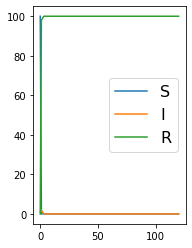

In [23]:
plt.subplot(1, 2, 1)
plt.plot(nb_S, label='S')
plt.plot(nb_I, label='I')
plt.plot(nb_R, label='R')
plt.legend()
#plt.subplot(1, 2, 2)
#plt.plot(max_deg_I, 'r-', label='max_deg_I')
#plt.plot(tot_deg_I, 'm-', label='tot_deg_I')
#plt.legend()

### References   
Bertotti M.L and Modanese G (2019) The Configuration Model for Barabasi-Albert Network. *Applied Network Science*, **4**, Page 32   
He X, Lau EH, Wu P, Deng W et al., (2020) Temporal Dynamics in Viral Shedding and Transmissibility in COVID-19. *Nature Medicine*, **26**, Pages 672-675   
Masuda N, Sakaki M, Ezaki T and Watanabe T (2018) Clustering Coefficients for Correlation Networks. *Frontiers in Neuroinformatics*, **12**, Page 7